<a href="https://colab.research.google.com/github/jayuan101/Consumer-Complaint-Finance/blob/main/Consumer_Complaint_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import os
import pandas as pd
import seaborn as sns

In [ ]:
for dirname, _, filenames in os.walk('/content/database.sqlite'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

Text(0, 0.5, 'Product')

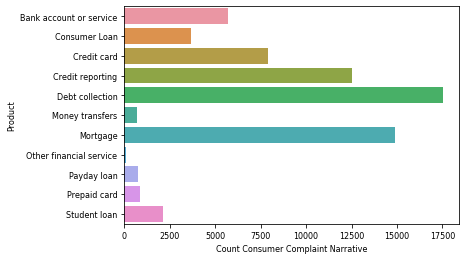

In [ ]:
df = pd.read_csv('/content/consumer_complaints.csv')
print(df.info())
data = df[df['consumer_complaint_narrative'].isnull()==False]

product_distribution = data.groupby('product').count().reset_index()
plt.rcParams.update({'font.size':8})
sns.barplot(x=product_distribution['consumer_complaint_narrative'], y=product_distribution['product'])
plt.xlabel('Count Consumer Complaint Narrative')
plt.ylabel('Product')

In [ ]:
onsumer_complaint_narrative'].values
text_no_punc = [re.sub(r'[^\w\s]','',t) for t in text]
text_cleaned = [t.strip().lower() for t in text_no_punc]

def spacy_tokenizer(t):
    token = [word for word in t.split() if word not in stop_words]
    return token

text_tokened = [spacy_tokenizer(t) for t in text_cleaned]
text_processed = [','.join(t).replace(',',' ') for t in text_tokened]

print(text_processed[0])

SyntaxError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
target_vars = data['product'].values
le.fit(target_vars)
y = le.transform(target_vars)

X_train, X_test, y_train, y_test = train_test_split(text_processed, y, test_size = 0.3, random_state=42)

TV = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
TV.fit(text_processed)

X_train_TV = TV.transform(X_train)
X_test_TV = TV.transform(X_test)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

xg_clas = xgb.XGBClassifier(colsample_bytree=0.3, learning_rate= 0.05, max_depth= 6, n_estimators= 500)
xg_clas.fit(X_train_TV, y_train)
y_pred_xg = xg_clas.predict(X_test_TV)

print('Accuracy Score XGBoost:',accuracy_score(y_test, y_pred_xg))
print(pd.crosstab(y_test, y_pred_xg, rownames = ['Actual'], colnames = ['Predicted']))